<!-- JPN -->
# 畳み込みニューラルネットワーク (CNN)

※本演習資料の二次配布・再配布はお断り致します。

<!-- ENG -->
# Convolutional neural network (CNN)

※Distribution or redistribution of these exercise materials without the copyright holder's permission is not permitted.

<!-- JPN -->
　畳み込みニューラルネットワーク (CNN) は画像の学習・予測に広く用いられている手法である。ここでは、MNISTの分類予測を通して、畳み込みニューラルネットワークの効果を見てみることにする。

<!-- ENG -->
　Convolutional Neural Network (CNN) is so widely used to image recognition tasks. Let's see the effectiveness of CNN by performing the MNIST classification prediction.

<!-- JPN -->
### 1 | CNNの構成要素のおさらい

　2次元のCNNは `torch.nn.Conv2d(16, 32, kernel_size=(5, 5), padding=2, stride=2)` のように定義するのだが、見てわかるようにこれまでの `torch.nn.Linear(512, 512)` に比べると設定すべきパラメータが多い。
これから自分が組むニューラルネットワークがどのような計算を行っているかを理解することは大切なので、講義でも習った要素を今一度確認しよう。

<!-- ENG -->
### 1 | Review of CNN components

　Two-dimensional CNN is defined as `torch.nn.Conv2d(16, 32, kernel_size=(5, 5), padding=2, stride=2)`, but as you can see, there are more parameters to set than `torch.nn.Linear(512, 512)` which we have already seen.
It is important to understand how  the calculations is performed in the neural network you are going to build, so let's confirm the elements we learned in the lecture once again.

<!-- JPN -->
#### 1.1 | 畳み込み演算
　画像処理における「畳み込み」という操作は、入力行列 $f$ とフィルタ $g$ を入力として、**フィルタの適用範囲を平行移動させながら $f$ と $g$ の積和を計算していく処理**であり、一般的には **$f*g$** と記述する。なお、後述のパディングを行わない限り出力の画像サイズは入力の画像サイズよりも小さくなることに注意しよう。

　この演算において、学習する重み $\boldsymbol{w}$ はどこにあるだろうか。**フィルタ $g$ の各要素が学習によって最適化される重み**である。

<!-- ENG -->
#### 1.1 | Convolution operation

　The "convolution" operation in image processing is **a process that calculates the sum of products of $f$ and $g$, that is normally indicated as $f*g$, while moving the filter application range in parallel** with the input matrix $f$ and the filter $g$ as inputs. Note that the output image size will be smaller than the input image size unless padding is applied as described below.



　In this operation, where are the weights $\boldsymbol{w}$ to be trained? **Each element of the filter $g$ is a weight to be optimized by training**.

<img src="https://i.imgur.com/GTQj9dH.png" alt="Figure 1" width="50%"></img>

<!-- JPN -->
#### 1.2 | 入力チャネル数と出力チャネル数


<!-- ENG -->
#### 1.2 | Number of input channels and number of output channels

<!-- JPN -->
　最も単純なCNNは各ピクセルごとに1つの値が存在するデータを処理する例である。これは、グレースケールの画像（例えばこれまでやってきたMNIST）を入力とする時などが考えられる。
一方、例えばカラーの画像はRGB (Red, Green, Blue) の3つのデータが各ピクセルに与えられており、これは**3チャネルの入力**ということができる。この場合は、1つの出力値を作るために3倍の計算を行う必要がある。



<!-- ENG -->
　The simplest CNN is an example of processing data where there is one value for each pixel. This may be the case when considering a grayscale image as an input (for example, MNIST which we have seen before).
On the other hand, a color image, for example, has three RGB (Red, Green, Blue) data given to each pixel, which can be called **a three-channel input**. In this case, it is necessary to perform three times as many calculations to create one output value.


![Figure 2](https://i.imgur.com/y3t7aw6.png)

<!-- JPN -->
　さらに、フィルタを複数用意することで出力チャネル数も複数にすることができる。下図は**入力チャネル数が3、出力チャネル数が2**であるようなCNNの例になっている。

　`torch.nn.Conv2d(16, 32, kernel_size=(5, 5), padding=2, stride=2)` のうち、16と32の数値がそれぞれ入力/出力チャネル数である。

<!-- ENG -->
　Furthermore, the number of output channels can be made multiple by preparing multiple filters. For example, Below figure is an example of a CNN such that **the number of input channels is 3 and the number of output channels is 2**.

　With `torch.nn.Conv2d(16, 32, kernel_size=(5, 5), padding=2, stride=2)`, the numbers 16 and 32 are the number of input/output channels, respectively.

<img src="https://i.imgur.com/mBXnaEY.png" alt="Figure 3" width="50%"></img>

<!-- JPN -->
#### 1.3 | フィルタサイズ（カーネルサイズ）

<!-- ENG -->
#### 1.3 | Filter size (kernel size)

<!-- JPN -->
　`torch.nn.Conv2d(16, 32, kernel_size=(5, 5), padding=2, stride=2)` の **`kernel_size=(5,5)`** で与えている情報、これがフィルタサイズ（あるいはカーネルサイズ）である。フィルタサイズは1つの値を出力するための**積和計算を行う範囲を示す値**で、例えば `(3,3)` であれば合計9ピクセルについて、入力データとフィルタとの積和を計算することになる（直前の図の例はフィルタサイズが3×3となっている）。

<!-- ENG -->
　**`kernel_size=(5,5)`** in the statement `torch.nn.Conv2d(16, 32, kernel_size=(5, 5), padding=2, stride=2)`, is the filter size (kernel size). The filter size is **a value that indicates the range where a sum-of-product calculation is performed** to output a single value, for example, `(3,3)` means that the sum-of-product calculation between the input data and the filter is performed for a total of 9 pixels (the example in above figure has a filter size of 3×3).

<!-- JPN -->
#### 1.4 | パディング (padding)

<!-- ENG -->
#### 1.4 | Padding

<!-- JPN -->
　`torch.nn.Conv2d(16, 32, kernel_size=(5, 5), padding=2, stride=2)` の **`padding=2`** がパディングである。
パディングが無いと前述のように出力の画像サイズが小さくなってしまう。それを防ぐために、周囲を0で埋めることがしばしば行われる。これがパディングである。フィルタサイズの1辺が $2k+1$ であるとき、パディングを $k$ とすることで、入力の画像サイズと出力の画像サイズが等しくなる。

<!-- ENG -->
　**`padding=2`** in the statement `torch.nn.Conv2d(16, 32, kernel_size=(5, 5), padding=2, stride=2)`, represents the padding.
If there is no padding, the output image size will be smaller, as mentioned above. To prevent this, the surrounding area is often filled with zeros. This is padding. If one side of the filter size is $2k+1$, then by setting the padding to $k$, the input image size is equal to the output image size.

<img src="https://i.imgur.com/s2IWPpB.png" alt="Figure 4" width="50%"></img>

<!-- JPN -->
#### 1.5 | ストライド (stride)

<!-- ENG -->
#### 1.5 | Stride

<!-- JPN -->
　かなり大きな画像に対して学習を行う場合、サイズの圧縮を狙って数ピクセルに1回だけ畳み込みを行うことがある。これがストライドであり、**`stride=2`** がそれにあたる。

　ただ、通常はストライドを増やすより、後述のMaxPoolingを利用するのが一般的である。

<!-- ENG -->
　When training on fairly large images, convolution may be performed only once every few pixels, with the goal of compressing size. This is stride, and **`stride=2`** is the stride.

　However, it is usually more common to use max pooling, which is described below, rather than increasing the stride.

<img src="https://i.imgur.com/FYKrN2A.png" alt="Figure 5" width="40%"></img>

<!-- JPN -->
### 1.6 | Max pooling（プーリング層）

<!-- ENG -->
### 1.6 | Max pooling (Pooling layer)

<!-- JPN -->
　次に、CNNと併せて用いられることが多いmax pooling（プーリング層）について簡単に説明する。Pooling層は複数のピクセルを1つの値にまとめる操作を行うもので、最大値を取るmax poolingが通常用いられる。これにより、わずかな画像の平行移動があっても予測に影響しにくくなると言われている。画像の1辺が1/2, 1/3の単位で小さくなるので、非常に大きな画像を学習する場合にはより大きなストライド幅のプーリング層を用いたり、多数のプーリング層を導入したりする。

　PyTorchでは、`torch.nn.MaxPool2d(2)` とすることで、ストライド2の二次元max poolingを行うことができる。

<!-- ENG -->
　Next, I will briefly explain max pooling (pooling layer), which is often used in conjunction with CNN. The pooling layer performs the operation of combining multiple pixels into a single value, and max pooling that takes the maximum value is usually used. As a result, it is said that even a slight transition of the image is less likely to affect the prediction.
Since one side of the image is reduced by 1/2 or 1/3, a pooling layer having a larger stride width is used or a large number of pooling layers are introduced when processing a very large image.

　In PyTorch, we can do two-dimensional max pooling with stride = 2 by using `torch.nn.MaxPool2d(2)`.

![Figure 6](https://i.imgur.com/kUH7lra.png)

<!-- JPN -->
### 1.7 | Flatten

<!-- ENG -->
### 1.7 | Flatten

<!-- JPN -->
　最後に、2次元状に並んだデータを（前回の演習までに利用していたような）1次元の配列に直す `torch.nn.Flatten()` について述べておく。 **`Flatten()` とは、2次元（以上）のデータを1次元に変換する操作のこと**である。複数チャネル存在している場合でも、1次元のベクトルに変換する。CNNを用いる学習では、最後の数層は `Linear()` 層を用いることが多いため、2次元空間のピクセル様のデータから、これまで取り扱ってきた1次元のベクトルに変換する操作が必要になる。**CNN系の層とこれまで用いてきた層をつなぐ役割を果たしている**と考えればよいだろう。

<!-- ENG -->
　Finally, let's talk about `torch.nn.Flatten()`, which converts two-dimensionally arranged data into a one-dimensional array (as we have been using in the previous exercises). **`Flatten()` is an operation that converts two-dimensional (or greater) data into one-dimensional data**. It converts to a one-dimensional vector even when multiple channels exist. In training using CNNs, the last few layers are often `Linear()` layers, which require operations to convert pixel-like data in 2D space into the one-dimensional vectors as we have been dealing with so far. You can think of it **as playing a role in connecting the CNN layer and the layers that we have been using so far**.

![Figure 7](https://i.imgur.com/FAwNc0x.png)

------

<!-- JPN -->
##### 課題 1

　入力画像のサイズが 2チャネル×縦10ピクセル×横12ピクセル である時、
`torch.nn.MaxPool2d(2)` によって得られる出力画像のサイズを答えよ。



<!-- ENG -->
##### Exercise 1

　When the input image size is 2 channels x height 10 pixels x width 12 pixels,
provide the output image size obtained using `torch.nn.MaxPool2d(2)`.

<!-- JPN -->
<font color=orange> **このテキストセルをダブルクリックし答案を記述せよ。** </font>
<!-- この下の行から答案を記述 -->


<!-- ENG -->
<font color=orange> **Double-click this text cell and write your answer.** </font>
<!-- From the next line, write your answer -->
The output image size obtained is 2 channels x height 5 pixels x width 6 pixels.

-----

<!-- JPN -->
### 2.1 | CNNを用いたMNISTの分類予測
　それでは、ここまでで説明してきたCNN, max pooling, flattenを利用して、手書き数字MNISTを学習してみよう。

<!-- ENG -->
### 2.1 | MNIST classification prediction using CNN

　Now, let's try to train handwritten numeric MNIST using CNN, max pooling, and flatten as described so far.

<!-- JPN -->
　まずは、前回と同様にlivelossplotを用いるためのインストールを行う。Google Colabはクラウドサービスのため、毎回不足しているパッケージをインストールしたり、あるいはデータを作る必要があるので注意しよう。

<!-- ENG -->
　The same as before, the first step is to install livelossplot. Note that Google Colab is a cloud service, so you will need to install the missing packages or even create the data each time.

In [1]:
# The following command is not a Python command, but can be executed by Google Colab.
# The Python package management tool called pip is used to install livelossplot.
!pip install livelossplot

<!-- JPN -->
　次に、MNISTデータの準備を行う。
$X$ の作成以外は前回と同じコードになっている。
$X$ は、**1チャネル（モノクロ画像）×縦28ピクセル×横28ピクセル**のデータとして準備を行うため、
 `X_train` などは `(データ数,1,28,28)` の4階テンソルに整形する。


<!-- ENG -->
　The next step is to prepare the MNIST data.
The code is the same as before except for the creation of $X$.
Since $X$ is prepared as data of **1 channel (monochrome image) x height 28 pixels  x width 28 pixels**, `X_train`, etc. is shaped into a 4 layer tensor `(number of data,1,28,28)`.



In [2]:
import numpy as np
import torch
import torchvision

trainset = torchvision.datasets.MNIST(root=".", train=True, download=True, transform=torchvision.transforms.ToTensor())
testset  = torchvision.datasets.MNIST(root=".", train=False, download=True, transform=torchvision.transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 201659380.91it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 87273554.63it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 129758928.98it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 20639792.81it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [3]:
# torch.tensor -> numpy.array
X_train = trainset.data.numpy()
y_train = trainset.targets.numpy()
X_test = testset.data.numpy()
y_test = testset.targets.numpy()

# scaled from [0,255] to [0,1] for X
X_train = X_train / 255
X_test  = X_test / 255

In [4]:
from sklearn.model_selection import train_test_split
# Split the train into 50,000 training data and 10,000 validation data
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      train_size=50000, random_state=0)

# Use test as is

In [5]:
# Here are the changes
# 1 channel × height 28 pixel  × width 28 pixel
X_train_fig = X_train.reshape(50000, 1, 28, 28)
X_valid_fig = X_valid.reshape(10000, 1, 28, 28)
X_test_fig  = X_test.reshape(10000, 1, 28, 28)

<!-- JPN -->
　あとは、いつもと同様に `torch.tensor` に変換させて、 `DataLoader` まで作ってしまおう。

<!-- ENG -->
　Then, as we usual do, let's convert the data to `torch.tensor` and create a `DataLoader`.

In [7]:
# PLEASE DO NOT CHANGE THIS BATCH SIZE because it affects the result of the assignments
batch_size = 128 # This time, we will train for each of the 128 data items

In [8]:
# training set
X_train_torch = torch.tensor(X_train_fig, dtype=torch.float) # Don't forget dtype=torch.float
y_train_torch = torch.tensor(y_train, dtype=torch.long)      # Don't forget dtype=torch.long
train_dataset = torch.utils.data.TensorDataset(X_train_torch, y_train_torch)
train_loader  = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)

In [9]:
# validation set
X_valid_torch = torch.tensor(X_valid_fig, dtype=torch.float)
y_valid_torch = torch.tensor(y_valid, dtype=torch.long)
valid_dataset = torch.utils.data.TensorDataset(X_valid_torch, y_valid_torch)
valid_loader  = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size)

In [10]:
# test set
X_test_torch = torch.tensor(X_test_fig, dtype=torch.float)
y_test_torch = torch.tensor(y_test, dtype=torch.long)
test_dataset = torch.utils.data.TensorDataset(X_test_torch, y_test_torch)
test_loader  = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

<!-- JPN -->
　続いて、前回と同様にGPUの利用設定や、学習および予測のための関数群を定義する。前回の演習時のコードと全く変わらない。`DataLoader` を使えるモデルであれば汎用的に使えるように関数は整備したので、実際の用途にも応用できるはずである。

<!-- ENG -->
　Then, the same as before, define the GPU usage settings and a set of functions for training and prediction. The code is exactly the same as the code from the previous exercise. The functions have been prepared so that they can be used universally in any model that can use `DataLoader`, so they should be applicable for actual use.

In [11]:
import torch
from livelossplot import PlotLosses

In [12]:
def update_model(model, loss_fn, opt, train_loader):
  train_loss = 0
  train_correct = 0
  train_count = len(train_loader.dataset)

  for X, y in train_loader:
    X = X.cuda() # Transfer data to the GPU
    y = y.cuda() # Transfer data to the GPU
    y_pred = model(X) # Predict y from X

    _, predicted = torch.max(y_pred.data, 1) # Get the one with the largest probability out of the 10 classes of predicted probabilities
    train_correct += (predicted == y).sum().item() # Count the number of successful predictions (for accuracy calculation)

    loss = loss_fn(y_pred, y)        # Calculate the average of the training losses in a mini-batch
    train_loss += loss.item()*len(y) # Calculate the total training loss for the entire epoch

    # Update weights
    opt.zero_grad()
    loss.backward()
    opt.step()

  # Calculate the average training loss and prediction accuracy within an epoch
  mean_train_loss = train_loss / train_count
  train_accuracy = train_correct / train_count

  return mean_train_loss, train_accuracy

In [13]:
def evaluate_model(model, loss_fn, dataloader):
  model.eval() # Set to “evaluate” state when training is not performed (Supplementary Material S1)

  valid_loss = 0
  valid_correct = 0
  valid_count = len(dataloader.dataset)

  for X, y in dataloader:
    X = X.cuda() # Transfer to GPU
    y = y.cuda() # Transfer to GPU
    y_pred = model(X) # Predict y from X

    _, predicted = torch.max(y_pred.data, 1) # Get the one with the largest probability out of the 10 classes of predicted probabilities
    valid_correct += (predicted == y).sum().item() # Count the number of successful predictions (for accuracy calculation)

    loss = loss_fn(y_pred, y)        # Calculate the average of the training losses in a mini-batch
    valid_loss += loss.item()*len(y) # Calculate the total training loss for the entire epoch

  mean_valid_loss = valid_loss / valid_count
  valid_accuracy = valid_correct / valid_count

  model.train() # Return from the “evaluate” state to the “train” state
  return mean_valid_loss, valid_accuracy

In [14]:
def train(model, loss_fn, opt, train_loader, valid_loader, epoch=50):
  liveloss = PlotLosses()
  for i in range(epoch):
    train_loss, train_accuracy = update_model(model, loss_fn, opt, train_loader)
    valid_loss, valid_accuracy = evaluate_model(model, loss_fn, valid_loader)

    # Visualize the loss and accuracy values.
    liveloss.update({
        'loss': train_loss,
        'val_loss': valid_loss,
        'accuracy': train_accuracy,
        'val_accuracy': valid_accuracy,
    })
    liveloss.draw()
  print('Accuracy: {:.4f} (valid), {:.4f} (train)'.format(valid_accuracy, train_accuracy))
  return model # Return the trained model

<!-- JPN -->
　それでは、CNN＋LinearによるMNIST予測モデルを構築し、学習を行ってみよう。今回は `Conv2d()` を1回行うごとに `MaxPool2d()` で画像サイズを2分の1にしているが、複数回 `Conv2d()` をしてから `MaxPool2d()` をすることもある（2012年に開催された画像認識コンテスト ILSVRC2012 で優勝した AlexNetのネットワーク構造を見てみると良い）。

<!-- ENG -->
　Now, let's build and train an MNIST prediction model using CNN + Linear. In this case, `MaxPool2d()` is used to halve the image size after each `Conv2d()`, but `MaxPool2d()` may be used after multiple `Conv2d()` (you may want to take a look at the AlexNet network structure, winner of the image recognition contest ILSVRC2012).

In [20]:
torch.manual_seed(0) # Ensure reproducibility of training results
torch.backends.cudnn.deterministic = True

cnn = torch.nn.Sequential(
    torch.nn.Conv2d(1, 16, (5, 5), padding=2),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(2),
    torch.nn.Conv2d(16, 32, (5, 5)),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(2),
    torch.nn.Flatten(),
    torch.nn.Linear(32*4*4, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 10),
)
cnn.cuda()

Sequential(
  (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=512, out_features=256, bias=True)
  (8): ReLU()
  (9): Linear(in_features=256, out_features=10, bias=True)
)

<!-- JPN -->
　上記のCNNの定義のコードの中には**入力画像サイズ（縦横 28 ピクセルずつ）が明示的に記述されていない**ことに注意してほしい。上記のモデルの各段階で画像データがどのような変遷をたどるか、下に図で示すので、こちらも併せてみておくと良いだろう。

<!-- ENG -->
　Note that **the input image size (28 pixels for each height/width) is not explicitly described** in the code of the CNN definition indicated above. Below figure illustrates the evolution of the image data in each stage of the above model, so it is a good idea to check this as well.

![Figure 8](https://i.imgur.com/GfxYmY0.png)

<!-- JPN -->
**今回構築したネットワーク** 画像状の構造をしているデータは常に正方であるため、画像幅とチャネル数のみ値を記している。また、簡略化の為に活性化関数は直前の層と併せて記述した。


<!-- ENG -->
**Network build this time** Since the data having image-like structure constructed this time is always square, only the image width and the number of channels are shown. Also, for simplicity, the activation function is described together with the previous layer.


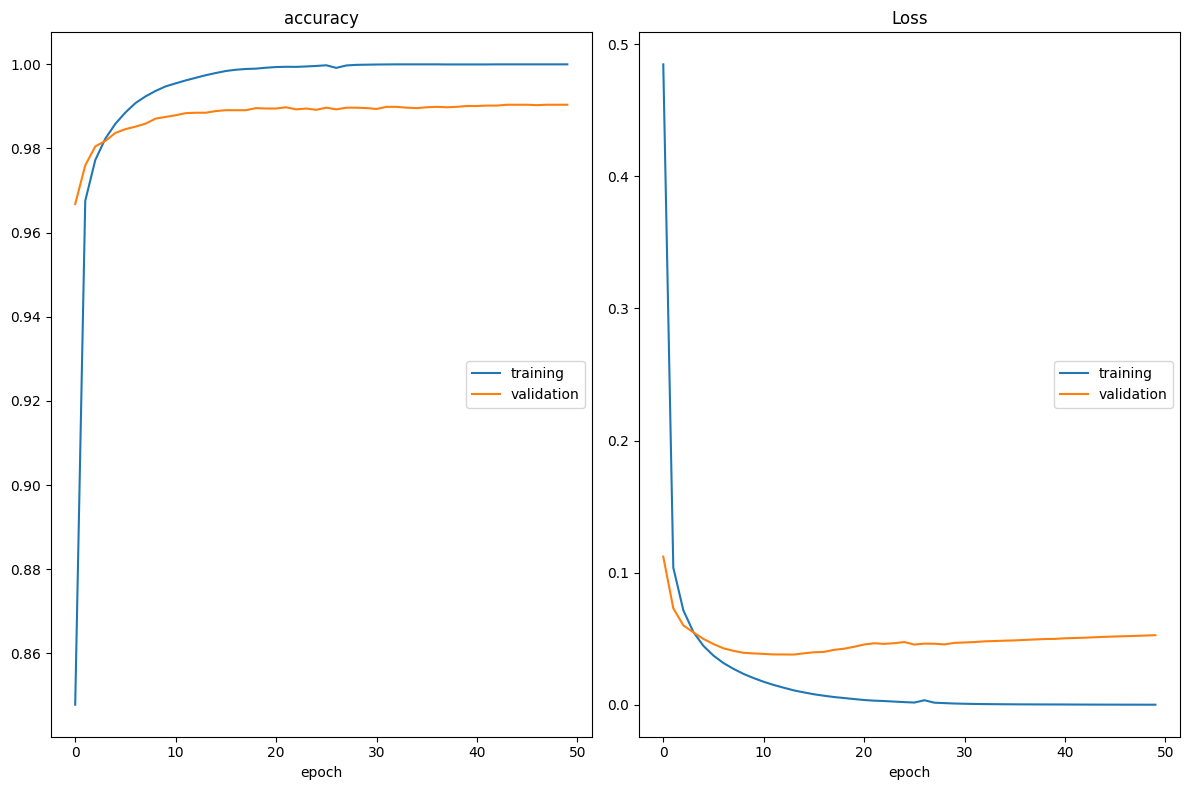

accuracy
	training         	 (min:    0.848, max:    1.000, cur:    1.000)
	validation       	 (min:    0.967, max:    0.990, cur:    0.990)
Loss
	training         	 (min:    0.000, max:    0.485, cur:    0.000)
	validation       	 (min:    0.038, max:    0.112, cur:    0.053)
Accuracy: 0.9904 (valid), 1.0000 (train)
0.048307303021797726
0.9897


In [17]:
torch.manual_seed(0) # Ensure reproducibility of training results
torch.backends.cudnn.deterministic = True

# Prepare loss functions and optimization methods
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cnn.parameters(), lr=0.1)

# Run training
trained_model = train(cnn, loss_fn, optimizer, train_loader, valid_loader)

# Run predictions
test_loss, test_accuracy = evaluate_model(trained_model, loss_fn, test_loader)
print(test_loss)
print(test_accuracy)

<!-- JPN -->
　先ほどは、至極当然のようにmodelを作成したが、各層の入力サイズ・出力サイズを意識しながらモデルを構築することは案外難しい。`Flatten` の直前では**32チャネル×縦4ピクセル×横4ピクセル**になっている、ということは、一瞬見ただけではなかなか理解ができない。

　このような場合、`torchsummary` というライブラリを用いることで、簡単に各層の出力サイズを見ることができる。実際に利用してみよう。

<!-- ENG -->
　In the previous section, we created a model as a matter of course, but it is surprisingly difficult to build a model while being aware of the input and output sizes of each layer. Just before `Flatten`, it is **32 channels x height 4 pixels x width 4 pixels**, which is not easy to understand just by looking at it for a moment.

　In such a case, we can easily see the output size of each layer by using a library called `torchsummary`. Let's try to actually use it.

In [18]:
# Mid-way model extracted up to Flatten processing
cnn_part = torch.nn.Sequential(
    torch.nn.Conv2d(1, 16, (5, 5)),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(2),
    torch.nn.Conv2d(16, 32, (5, 5)),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(2),
    torch.nn.Flatten()
)
cnn_part.cuda()

Sequential(
  (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
)

In [19]:
import torchsummary
torchsummary.summary(cnn_part, (1, 28, 28))
# Input the shape of the input (number of channels,
# height/width size), excluding the mini-batch

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 24, 24]             416
              ReLU-2           [-1, 16, 24, 24]               0
         MaxPool2d-3           [-1, 16, 12, 12]               0
            Conv2d-4             [-1, 32, 8, 8]          12,832
              ReLU-5             [-1, 32, 8, 8]               0
         MaxPool2d-6             [-1, 32, 4, 4]               0
           Flatten-7                  [-1, 512]               0
Total params: 13,248
Trainable params: 13,248
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.20
Params size (MB): 0.05
Estimated Total Size (MB): 0.25
----------------------------------------------------------------


<!-- JPN -->
　このように、入力が1チャネル×縦28ピクセル×横28ピクセルだった場合の各層の出力サイズが表示され、`Flatten` の出力が512次元であることがわかる。`Flatten` の次の `Linear` 層の入力次元数は512とすればよいようだ。

<!-- ENG -->
　As you can see, the output size of each layer is displayed when the input is 1 channel x height 28 pixels x width 28 pixels, and you can see that the output of `Flatten` is 512-dimensional. Therefore the input dimensionality of the next `Linear` layer after `Flatten` should be 512.

-----

<!-- JPN -->
##### 課題 2

　間違ったモデルを組んだ状態で学習をさせようとするとどうなるだろうか。
予測まで行う説明で使ったモデルの最初の `Conv2d()` を `torch.nn.Conv2d(1, 16, (5, 5), padding=2)` とすることで（誤った）モデルを構成し、`train()` を実行せよ。この時、どのようなエラーが発生するだろうか。エラーメッセージを報告し、メッセージの内容を簡単に説明せよ。

<!-- ENG -->

##### Exercise 2

　What happens if we try to train with the wrong model?
Construct the “wrong” model by rewriting the first `Conv2d()` part, which was used in the explanation up to the prediction, into `torch.nn.Conv2d(1, 16, (5, 5), padding=2)`, and execute `train()`. What kind of error would occur at this point? Report the error message and briefly explain the content of the message.

<!-- BOTH -->
```
cnn = torch.nn.Sequential(
    torch.nn.Conv2d(1, 16, (5, 5)), # Rewrite this line to create the wrong model
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(2),
    torch.nn.Conv2d(16, 32, (5, 5)),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(2),
    torch.nn.Flatten(),
    torch.nn.Linear(32*4*4, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 10),
)
```

<!-- JPN -->
<font color=orange> **このテキストセルをダブルクリックし答案を記述せよ。** </font>
<!-- この下の行から答案を記述 -->


In [21]:
torch.manual_seed(0) # Ensure reproducibility of training results
torch.backends.cudnn.deterministic = True

# Prepare loss functions and optimization methods
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cnn.parameters(), lr=0.1)

# Run training
trained_model = train(cnn, loss_fn, optimizer, train_loader, valid_loader)

# Run predictions
test_loss, test_accuracy = evaluate_model(trained_model, loss_fn, test_loader)
print(test_loss)
print(test_accuracy)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (128x800 and 512x256)

<!-- ENG -->
<font color=orange> **Double-click this text cell and write your answer.** </font>
<!-- From the next line, write your answer -->
The error message is:

RuntimeError: mat1 and mat2 shapes cannot be multiplied (128x800 and 512x256)

The padding operation make the shape of mat1 cannot be multiplied with mat2.

-----

<!-- JPN -->
##### 課題 3

　課題 2におけるエラーメッセージを参考に `torch.nn.Flatten()` 直後の `torch.nn.Linear()` の入力次元数を修正することで、`train()` を行ってもエラーが発生せずに学習を行えるネットワークを作成せよ。また、実装したネットワークについて学習を実施し、50エポック終了時のモデルの訓練データ、検証データ、テストデータに対する正解率を比率で報告せよ。


<!-- ENG -->

##### Exercise 3

　Referencing the error message in Exercise 2, modify the number of input dimensions of `torch.nn.Linear()` immediately after `torch.nn.Flatten()` to create a network that can be trained without error even if `train()` is performed. Additionally, train the network and report accuracy rate for training, validation, and test data for the model at the end of 50 epochs.


In [22]:
# CODE CELL FOR YOUR ANSWER

torch.manual_seed(0) # Ensure reproducibility of training results
torch.backends.cudnn.deterministic = True

cnn_with_padding = torch.nn.Sequential(
    torch.nn.Conv2d(1, 16, (5, 5), padding=2),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(2),
    torch.nn.Conv2d(16, 32, (5, 5)),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(2),
    torch.nn.Flatten(),
    torch.nn.Linear(50*4*4, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 10),
)
cnn_with_padding.cuda()

Sequential(
  (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=800, out_features=256, bias=True)
  (8): ReLU()
  (9): Linear(in_features=256, out_features=10, bias=True)
)

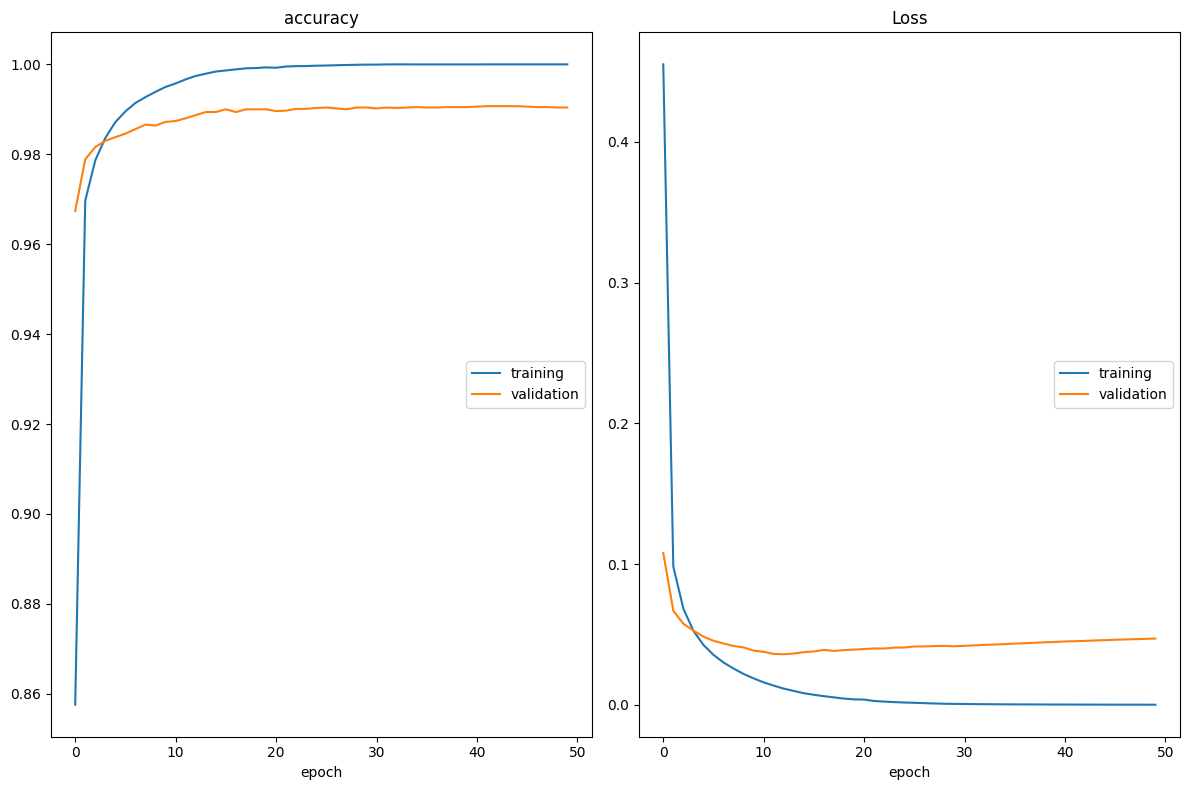

accuracy
	training         	 (min:    0.858, max:    1.000, cur:    1.000)
	validation       	 (min:    0.967, max:    0.991, cur:    0.990)
Loss
	training         	 (min:    0.000, max:    0.455, cur:    0.000)
	validation       	 (min:    0.036, max:    0.108, cur:    0.047)
Accuracy: 0.9904 (valid), 1.0000 (train)


In [23]:
torch.manual_seed(0) # Ensure reproducibility of training results
torch.backends.cudnn.deterministic = True

# Prepare loss functions and optimization methods
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cnn_with_padding.parameters(), lr=0.1)

# Run training
trained_model = train(cnn_with_padding, loss_fn, optimizer, train_loader, valid_loader)

# Run predictions
cnn_train_loss, cnn_train_accuracy = evaluate_model(trained_model, loss_fn, train_loader)
cnn_valid_loss, cnn_valid_accuracy = evaluate_model(trained_model, loss_fn, valid_loader)
cnn_test_loss, cnn_test_accuracy = evaluate_model(trained_model, loss_fn, test_loader)

<!-- BOTH -->
----

<!-- JPN -->
##### 課題 4（実践、提出不要）

　これまでは一定epoch後のモデルをそのまま予測モデルとして使用した。しかし、これは訓練データへ過学習した予測モデルを作成してしまう恐れがある。このことから、検証データに対する損失 loss が最小になったと推定される時のモデルを予測モデルとして利用することが一般的である。

　そこで、指定されたepoch数の学習を実施した上で、各epochの中で最も検証データに対する損失が低かったモデルを出力する機構を `train()` 関数に追加実装せよ。また、この `train()` 関数を利用することで、実際に予測モデルを構築し、テストデータに対する予測精度がどのように変化するか検証せよ（※今回のケースでは大きな変化がない可能性が高い。学習データとして使う画像の数を減らすなどして過学習が発生しやすい状況を作ると良い）。

<!-- ENG -->
##### Exercise 4 (Practical, not required to submit)

Until now, the model after training of a certain epoch was used as-is as a prediction model. However, this may result in the prediction model that is overfitted to the training data. Therefore, it is common to use the model when the loss to the validation data seems minimized as the prediction model.

Implement an additional mechanism in the `train()` function that outputs the model with the lowest loss to the validation data. Also, by using this `train()` function, train a prediction model and verify how the prediction accuracy against the test data changes (*It is highly likely that there is no significant change in this case. It is recommended to reduce the number of images used as training data to make a situation where overfitting is likely to occur).

---

<!-- JPN -->
### 2.2 | CNNを使うときの注意点

<!-- ENG -->
### 2.2 | Points of caution when using CNN

<!-- JPN -->
　ここまで、画像データに対する畳み込みニューラルネットワークが如何に強力であるかを説明してきた。一方で、**CNNはいかなるデータに対しても使える万能ツールではない**ことに注意してほしい。

　一番最初に説明したように、CNNは自分自身の座標と近傍の座標にある値（チャネル）を使って、新しい値を作りだすような層であったが、**「近傍」の情報を取り込むことが予測を行う上で重要だ、ということがわかっている場合にのみ有効**である。例えば、titanicデータセットでは、"Sex", "Fare", "Age", "Pclass" などの特徴量の列の並びは全く意味を持っていない。このような場合には `torch.nn.Linear()` を使うべきである。

　**畳み込みニューラルネットワークはその特徴量の並びに意味があるときにのみ効果を発揮する**と考えてほしい。

<!-- ENG -->
　So far, I have explained how powerful convolutional neural networks are for image data. On the other hand, please note that **CNN is not a universal tool that can be used for any data**.

　As explained at the very beginning, CNN is a layer that uses values (channels) in its own coordinates and those of its neighbors to create new values, but it is **only useful if we know that capturing “nearest neighbor” information is important for making predictions**. For example, in the titanic data set, the order of feature columns such as "Sex", "Fare", "Age", and "Pclass" has no meaning at all. The fully-connected layer `torch.nn.Linear()` should be used in such a case.

　Please remember that **a convolutional neural network is effective only when the sequence of features is meaningful**.

-----

<!-- JPN -->
##### 課題 5（発展）

　研究において、「他人が再現実験が行えること」は非常に重要な要素である。
CNNモデルを自由に組み立て、学習を行った上で、テストデータの予測正解率を報告せよ。ただし、**採点者が全く同じ結果を得るために必要な情報を付与**せよ。


<!-- ENG -->

##### Exercise 5 (Advanced)

　In research, "the ability of others to reproduce the test" is a very important factor.
Freely construct a CNN model, train it, and then report the predicted accuracy of the test data. However, **give the assessors the information they need to get the exact same result**.


<!-- JPN -->
<font color=orange> **このテキストセルをダブルクリックし答案を記述せよ。** </font>
<!-- この下の行から答案を記述 -->


<!-- ENG -->
<font color=orange> **Double-click this text cell and write your answer.** </font>
<!-- From the next line, write your answer -->


In [26]:
# CODE CELL FOR YOUR ANSWER
# ADDING CODE CELL IS ACCEPTABLE IN THIS EXERCISE
torch.manual_seed(0) # Ensure reproducibility of training results
torch.backends.cudnn.deterministic = True

cnn_with_padding = torch.nn.Sequential(
    torch.nn.Conv2d(1, 16, (5, 5), padding=3),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(2),
    torch.nn.Conv2d(16, 48, (5, 5)),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(2),
    torch.nn.Flatten(),
    torch.nn.Linear(75*4*4, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 10),
)
cnn_with_padding.cuda()

Sequential(
  (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(3, 3))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 48, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=1200, out_features=256, bias=True)
  (8): ReLU()
  (9): Linear(in_features=256, out_features=10, bias=True)
)

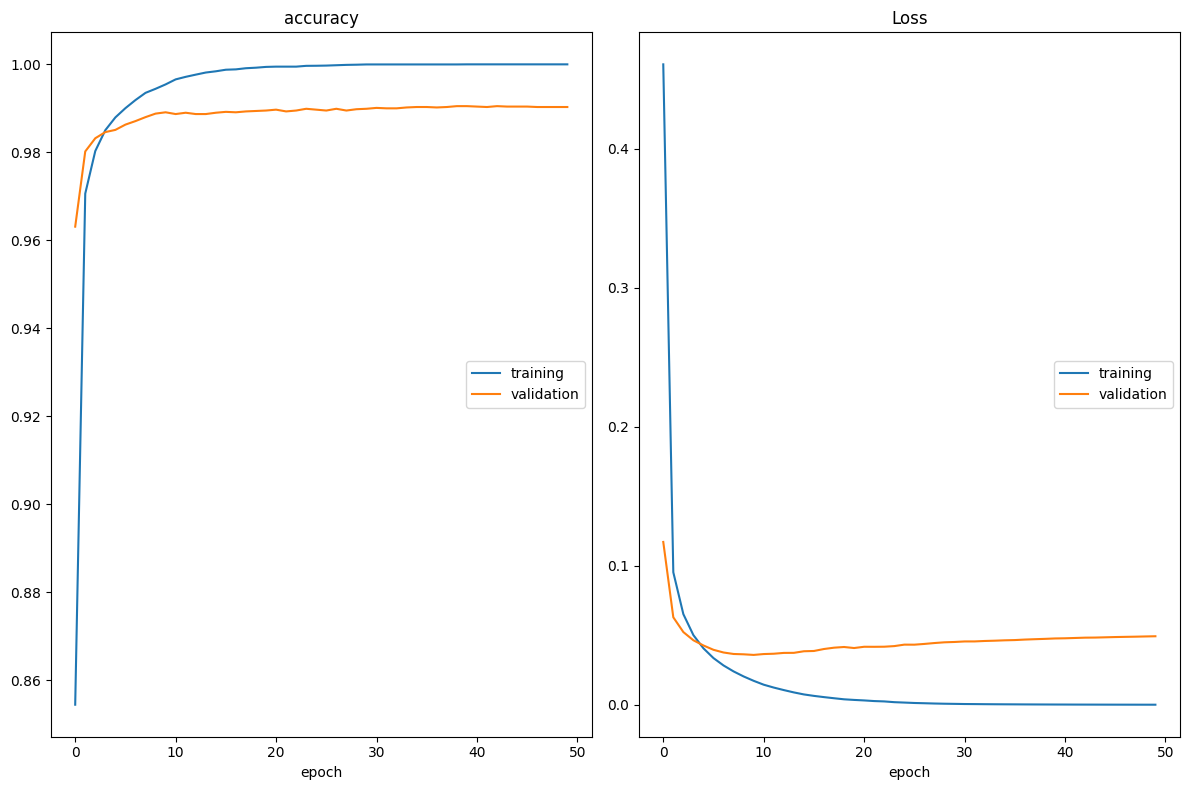

accuracy
	training         	 (min:    0.854, max:    1.000, cur:    1.000)
	validation       	 (min:    0.963, max:    0.991, cur:    0.990)
Loss
	training         	 (min:    0.000, max:    0.461, cur:    0.000)
	validation       	 (min:    0.036, max:    0.117, cur:    0.049)
Accuracy: 0.9903 (valid), 1.0000 (train)


In [27]:
torch.manual_seed(0) # Ensure reproducibility of training results
torch.backends.cudnn.deterministic = True

# Prepare loss functions and optimization methods
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cnn_with_padding.parameters(), lr=0.1)

# Run training
trained_model = train(cnn_with_padding, loss_fn, optimizer, train_loader, valid_loader)

# Run predictions
cnn_train_loss, cnn_train_accuracy = evaluate_model(trained_model, loss_fn, train_loader)
cnn_valid_loss, cnn_valid_accuracy = evaluate_model(trained_model, loss_fn, valid_loader)
cnn_test_loss, cnn_test_accuracy = evaluate_model(trained_model, loss_fn, test_loader)